In [1]:
import os
import pandas as pd
import sklearn.cluster as skclust
from sklearn import preprocessing
import numpy as np
import pickle
from sklearn import metrics

# seed = 0
# np.random.seed(seed)

parent_path = os.path.abspath('../')
data_path = parent_path + '/data/davos/'
csv_ext = '.csv'

k_min = 2
k_max = 3
num_seeds = 5

k_vals = list(range(k_min, k_max))

file_name = 'conv_strategy_analysis_vsn'
output_file_name = file_name + '_clusters'
cluster_file_name = 'clusters.pkl'

file_path = data_path + file_name + csv_ext

user_profiles = pd.read_csv(file_path, index_col=0)
X = user_profiles.as_matrix()
# print(X)
# print(np.average(X, axis=0))
# print(np.std(X, axis=0))
X = preprocessing.scale(X, axis=0)
print(X.shape)

# sh = X.shape
# X = (np.random.rand(sh[0], sh[1]) - np.random.rand(sh[0], sh[1]))/2
# cluster_assignments = np.zeros((X.shape[0], num_seeds))

# for k in k_vals:
#     for seed in range(num_seeds):
#         est = skclust.KMeans(n_clusters = k, random_state=np.random.randint(1000))
#         est.fit(X)
#         if np.sum(est.labels_) < np.sum(1-est.labels_):
#             num_i_type = np.sum(est.labels_)
#         cluster_assignments[:, seed] =  

sil_scores = np.zeros(num_seeds)
cal_scores = np.zeros(num_seeds)
for seed in range(num_seeds):
    # est = skclust.KMeans(n_clusters = 4, random_state=np.random.randint(1000))  
    est = skclust.AgglomerativeClustering(n_clusters=4, linkage='ward')
#     est = skclust.SpectralClustering(n_clusters=2)
    est.fit(X)
    labels = est.labels_
    print(np.sum(labels == 0))
    print(np.sum(labels == 1))
    print(np.sum(labels == 2))
    print(np.sum(labels == 3))
    print()
#     labels = np.random.randint(0, 2, X.shape[0])
    sil_scores[seed] = metrics.silhouette_score(X, labels, metric='euclidean')
    cal_scores[seed] = metrics.calinski_harabaz_score(X, labels)

print("All scores: ")
print(sil_scores)
print(cal_scores)

print("Averages: ")
print(np.average(sil_scores))
print(np.average(cal_scores))

print("Standard Deviation: ")
print(np.std(sil_scores))
print(np.std(cal_scores))

# est = KMeans(n_clusters = 2, random_state=np.random.randint(1000))
# est.fit(X)

# est = AgglomerativeClustering(n_clusters=2, linkage='ward')
# est.fit(X)

# print(est.labels_.T)
# print(np.sum(est.labels_))
# print(np.sum(1-est.labels_))
# user_profiles['Cluster'] = est.labels_
# user_profiles.to_csv(data_path + output_file_name + csv_ext)

/Users/alankar/miniconda3/envs/prelim-analysis-research/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(65, 6)
42
17
4
2

42
17
4
2

42
17
4
2

42
17
4
2

42
17
4
2

All scores: 
[0.2949887 0.2949887 0.2949887 0.2949887 0.2949887]
[15.73655132 15.73655132 15.73655132 15.73655132 15.73655132]
Averages: 
0.29498870335266525
15.736551320147644
Standard Deviation: 
0.0
0.0


In [3]:
output_file_name = 'final_clusters.csv'
cluster_file_name = 'clusters_full.pkl'
tid_col_name = 'Transcript ID'
cluster_col_name = 'Final Cluster'

df = pd.read_csv(data_path + output_file_name, index_col=None)
print(df[tid_col_name])
cluster_map = dict(zip(df[tid_col_name], df[cluster_col_name]))

with open(data_path + cluster_file_name, 'wb') as f:
    pickle.dump(cluster_map, f, pickle.HIGHEST_PROTOCOL)

0      509907
1      509921
2      509969
3      509997
4      510196
5      510275
6      510401
7      510410
8      510422
9      510457
10     510500
11     510688
12     510734
13     510849
14     510881
15     510910
16     510918
17     510999
18     511250
19     511447
20     511512
21     511665
22     511862
23     512508
24     513033
25     513058
26     513210
27     513324
28     513762
29     513935
       ...   
35     515151
36     515233
37     515289
38     515762
39     515843
40     516135
41     516417
42     516517
43    1001335
44    1001444
45    1001636
46    1001877
47    1001918
48    1002013
49    1002242
50    1002281
51    1002422
52    1002648
53    1002655
54    1003016
55    1003158
56    2001299
57    2001521
58    2001541
59    2002040
60    2004828
61    2005036
62    2005133
63    2008165
64    2016938
Name: Transcript ID, Length: 65, dtype: int64


[[-8.00558845e-01  1.59265429e+00]
 [ 9.99675388e-01  2.80193785e-01]
 [ 1.25359629e+00  3.71239305e-01]
 [ 1.53017746e-01 -9.42716888e-02]
 [-5.54109958e-01 -2.45244032e-01]
 [ 1.24252836e+00  7.51955137e-01]
 [ 1.04614020e-01 -1.03150990e+00]
 [-3.86045096e-01 -2.91926010e-01]
 [-4.16553488e-01 -1.80516247e-01]
 [-7.82970219e-01 -8.80896631e-01]
 [-1.30087833e+00 -9.21466768e-01]
 [-1.06388793e+00 -7.04774551e-01]
 [ 1.10931264e+00 -1.14750652e+00]
 [-3.14868795e-01  9.54137201e-02]
 [-2.01130273e+00 -6.22011882e-02]
 [ 2.96773304e-01 -1.19257065e+00]
 [ 9.12934309e-02 -4.65052095e-01]
 [ 2.74240442e+00 -6.53689357e-01]
 [-6.80693940e-02 -4.10109704e-01]
 [ 1.30630536e+00 -7.17289733e-01]
 [-1.62866303e+00 -8.10674340e-02]
 [ 2.12841812e-01  1.48491808e+00]
 [-1.14126332e+00  7.09124666e-02]
 [-2.16130292e-01  2.71395651e+00]
 [-6.14911859e-01  1.14357125e+00]
 [-1.56827818e-01 -3.95048377e-01]
 [ 1.87393904e+00  6.96038320e-01]
 [-4.08460653e-01 -4.80802495e-01]
 [-9.73807656e-01 -2

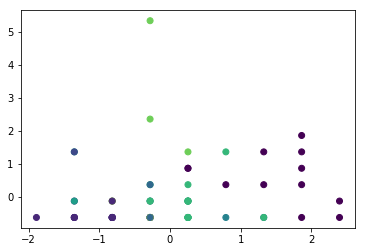

[390.0, 322.5096161420936, 262.2094049000219, 222.43234012750074, 181.03257972158508, 155.55569678093656, 139.81311024039982, 123.4584592345993, 111.7335790950548, 100.90755434694196, 89.32140118982544, 82.56583747271262, 73.5324975827635, 64.429151083548, 60.67969729706807, 54.924305604663125, 51.45223910949201, 49.529587383615386, 46.00774944741791, 43.984729615783635, 40.29465078601365, 36.160744823322354, 33.880303425772794, 33.22843795155657, 29.550066812739765, 27.688170569119947, 25.232294970674708, 23.665204475189142, 21.890731876406285, 19.400988197909157]


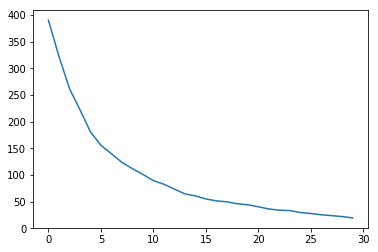

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X)
X_pca = pca.transform(X)
print(X_pca)
print(pca.explained_variance_ratio_)

plt.scatter(X[:, 0], X[:, 1], c=est.labels_)
plt.show()

inertia_list = []
for j in range(30):
    est = KMeans(n_clusters = j+1)
    est.fit(X)
    inertia_list.append(est.inertia_)

print(inertia_list)
plt.plot(inertia_list)

[4. 4. 4. 4. 4. 2. 3. 3. 2. 3. 4.]
[ 15  45  75 105 135 165 195 225 255 285 315]
11


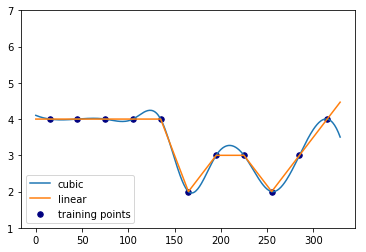

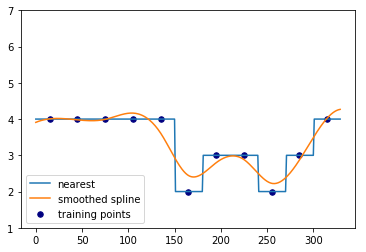

In [6]:
from scipy import interpolate
all_rapp = []
all_ids = []
with open(parent_path + '/data/davos/rapport_evolution.txt', 'r') as f:
    rows = f.readlines()
    for row in rows:
        id = row.split()[0]
        all_ids.append(id)
        rapp = np.array(row.split(" ")[1:-2]).astype(np.float)
        all_rapp.append(rapp)

y = all_rapp[0]
print(y)
x = np.arange(15,y.shape[0]*30+15,30)
print(x)
print(y.shape[0])

plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

f = interpolate.interp1d(x, y, kind='cubic', fill_value='extrapolate')
xnew = np.arange(0, 330)
ynew = f(xnew)
plt.ylim(ymin=1, ymax=7)
plt.plot(xnew, ynew, label='cubic')

f = interpolate.interp1d(x, y, kind='linear', fill_value='extrapolate')
xnew = np.arange(0, 330)
ynew = f(xnew)
plt.ylim(ymin=1, ymax=7)
plt.plot(xnew, ynew, label='linear')

plt.legend(loc='lower left')
plt.show()

plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
f = interpolate.interp1d(x, y, kind='nearest', fill_value='extrapolate')
xnew = np.arange(0, 330)
ynew = f(xnew)
plt.ylim(ymin=1, ymax=7)
plt.plot(xnew, ynew, label='nearest')

f = interpolate.UnivariateSpline(x, y, s=0.5)
xnew = np.arange(0, 330)
ynew = f(xnew)
plt.ylim(ymin=1, ymax=7)
plt.plot(xnew, ynew, label='smoothed spline')

plt.legend(loc='lower left')
plt.show()


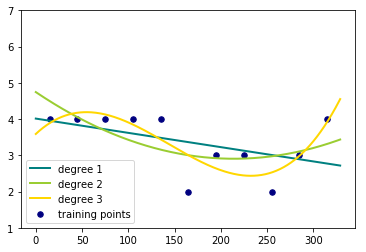

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
X = x[:, np.newaxis]
x_plot = np.arange(0, 330)
X_plot = x_plot[:, np.newaxis]

for count, degree in enumerate([1, 2, 3]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw, label="degree %d" % degree)

plt.legend(loc='lower left')
plt.ylim(ymin=1, ymax=7)
plt.show()

In [3]:
x = [1, 2, 3, 4, 5]
x[-3:]

[3, 4, 5]